In [ ]:
- YOU MOSTLY USE RANGE for for-loop iteration (in slidng window)

In [ ]:
#Best time to buy a stock
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        l, r = 0, 1
        maxProfit = 0

        while r < len(prices):
            if prices[r] > prices[l]:
                profit = prices[r] - prices[l]
                maxProfit = max(maxProfit, profit)
            else:
                l = r
            
            r += 1

        return maxProfit




In [ ]:
### Sliding window
### Longest substring wihtout repeating
class Solution:
    def lengthOfLongestSubstring(self, s: str) -> int:
        charSet = set()
        l = 0
        res = 0

        for r in range(len(s)):
            while s[r] in charSet:
                charSet.remove(s[l])
                l +=1
            charSet.add(s[r])
            res = max(res, len(charSet))

        return  res

In [ ]:
# Permutation of a string

class Solution:
    def checkInclusion(self, s1: str, s2: str) -> bool:
        n1 = len(s1)
        n2 = len(s2)

        counts_1 = {}
        window_count = {}
 
        # ---------------Edge case--------------#
        if n1 > n2:
            return False
        
        # ---------------Hashmap for s1--------------#
        for i in s1:
            counts_1[i] = counts_1.get(i, 0) + 1

        # ---------------Hashmap for first window--------------#
        for i in s2[:n1]:
            window_count[i] =  window_count.get(i, 0) + 1

        # ---------------Check for first case--------------#
        if counts_1 == window_count:
            return True


        # ---------------Check for all case so slide--------------#
        for i in range(n1, n2):
            
            ### 1. push new char in window
            window_count[s2[i]] = window_count.get(s2[i], 0) + 1

            ## 2. Remove last char
            char_remove = s2[i - n1]
            if window_count[char_remove] == 1:
                del window_count[char_remove]
            else:
                window_count[char_remove] -= 1

            ### 3. Check if the current window is a permutation of s1
            if window_count == counts_1:
                return True
            
        return False

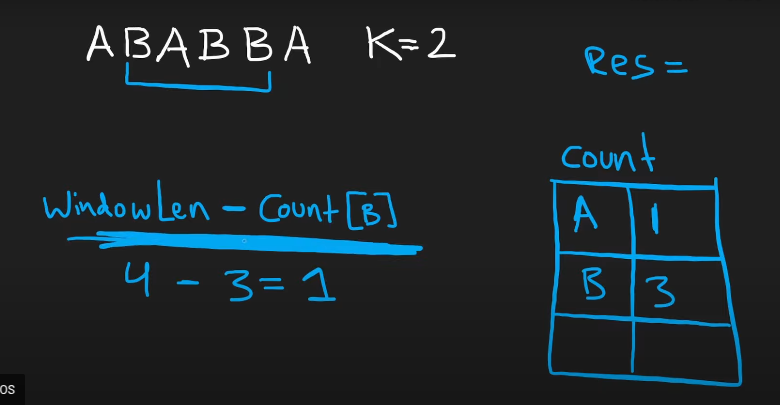

In [ ]:
### Longest repeating character replacement

class Solution:
    def characterReplacement(self, s: str, k: int) -> int:
        count = {}
        l = 0
        res = 0

        for r in  range(len(s)):
            # when you dont have s[r] in the count
            count[s[r]] = count.get(s[r], 0) + 1

            while (r - l + 1) - max(count.values()) > k:
                count[s[l]] -= 1
                l += 1
            
            res =  max(res, (r-l+1))

        return res
        


In [ ]:
### Permutation in substring

### FIrst way
class Solution:
    def checkInclusion(self, s1: str, s2: str) -> bool:
        n1, n2 = len(s1), len(s2)
        if n1 > n2:
            return False

        # Build frequency dictionaries for s1 and the first window of s2
        s1Count = {}
        s2Count = {}
        for i in range(n1):
            s1Count[s1[i]] = s1Count.get(s1[i], 0) + 1
            s2Count[s2[i]] = s2Count.get(s2[i], 0) + 1

        # Check if the first window is a permutation
        if s1Count == s2Count:
            return True

        # Slide the window over s2, updating the dictionary counts
        for i in range(n1, n2):
            # Include the new character in the window
            new_char = s2[i]
            s2Count[new_char] = s2Count.get(new_char, 0) + 1
            
            # Remove the character that is no longer in the window
            old_char = s2[i - n1]
            s2Count[old_char] -= 1
            if s2Count[old_char] == 0:
                del s2Count[old_char]
            
            # Compare dictionaries for the current window with s1's frequency
            if s1Count == s2Count:
                return True
        
        return False


### Second way
class Solution:
    def checkInclusion(self, s1: str, s2: str) -> bool:
        if len(s1) > len(s2):
            return False

        s1Count, s2Count = {}, {}
        matches = 0

        # Initialize frequency count dictionaries
        for i in range(len(s1)):
            s1Count[s1[i]] = s1Count.get(s1[i], 0) + 1
            s2Count[s2[i]] = s2Count.get(s2[i], 0) + 1
        
        # Count initial matches
        for char in s1Count:
            if s1Count.get(char, 0) == s2Count.get(char, 0):
                matches += 1

        l = 0
        for r in range(len(s1), len(s2)):
            if matches == len(s1Count):
                return True

            # Add new character to the window
            new_char = s2[r]
            s2Count[new_char] = s2Count.get(new_char, 0) + 1
            if s1Count.get(new_char, 0) == s2Count[new_char]:
                matches += 1
            elif s1Count.get(new_char, 0) + 1 == s2Count[new_char]:
                matches -= 1

            # Remove old character from the window
            old_char = s2[l]
            s2Count[old_char] -= 1
            if s2Count[old_char] == 0:
                del s2Count[old_char]  # Clean up dictionary
            if s1Count.get(old_char, 0) == s2Count.get(old_char, 0):
                matches += 1
            elif s1Count.get(old_char, 0) - 1 == s2Count.get(old_char, 0):
                matches -= 1

            l += 1

        return matches == len(s1Count)


In [ ]:
### Minimum window substring - HARD (but logically easy)

class Solution:
    def minWindow(self, s: str, t: str) -> str:
        # You take care of edge case
        if t == "": return ""

        # Have hashmap for count T whihc is exactly letters youwant and have hashmap for thr window
        countT, window = {}, {}
        
        # NOw create haspmap for countT these are the char you want to ohave in window
        for c in t:
            countT[c] = countT.get(c, 0) + 1
        
        # Now create have and need vairbale this will store the current match(have) btw current window and countT
        have, need = 0, len(countT)
        res, resLen = [-1, -1], float("infinity")
        
        # Now set the l and r for sliding windows
        l = 0
        for r in range(len(s)):
            # 1. take c and update window hashmap
            c = s[r]
            window[c] = window.get(c, 0) + 1

            # 2. check if we have all the chars in window which are required in T
            if c in countT and window[c] == countT[c]:
                have += 1 # if yes inc have count
            
            # 3. Now check if we have  all the required char we need as we need to match 'need'
            while have == need:
                # 4. update the result
                if (r - l + 1) < resLen:
                    res = [l, r]
                    resLen = (r - l + 1)
                
                # 5. Pop from left, as we have to find minimum windnow subtring with all required char present in T
                window[s[l]] -= 1
                # 6. Since we pop we need to check again if we are still maintin the match or not, if not then reduce the have count
                if s[l] in countT and window[s[l]] < countT[s[l]]:
                    have -= 1
                    
                # 7. Move the left pointer, to slide the window
                l += 1
        
        # 8. destrcuture the res in l and r variable
        l, r= res
        
        # 9. return l and r of s so that you return the subtring aplhabets, and also do one final check that the initial ste infinity was not chnage then it meesna we never oudn the subtring hence in that case return empty "" string
        return s[l:r+1] if resLen != float("infinity") else ""